In [1]:
# Check for TensorFlow and other dependencies
import caracal

if not caracal.TENSORFLOW_AVAILABLE:
    print("TensorFlow is not installed. Please install it with: pip install tensorflow")
else:
    print("TensorFlow is available. Proceeding with the example.")

from caracal.data import DataHandler
from caracal.core import KerasModelWrapper
from caracal.config import ModelConfig
from caracal.runners import ExperimentRunner
from caracal.loggers import BaseLogger

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd

2025-11-17 23:10:20.661918: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-17 23:10:20.693465: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-17 23:10:21.142542: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TensorFlow is available. Proceeding with the example.


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# --- Data Loading and Preparation ---
class MNISTDataHandler(DataHandler):
    """A custom DataHandler to load and preprocess the built-in MNIST dataset."""

    @property
    def data_type(self) -> str:
        return "image"

    @property
    def return_format(self) -> str:
        return "split_arrays"
        
    def __init__(self):
        # We don't need a data_path for this handler, but the parent class
        # expects one. We'll pass a placeholder and then override the validation.
        super().__init__(data_path="")

    def _validate_data_path(self):
        # We intentionally override the parent's validation because we are
        # loading a built-in dataset, not a file from disk.
        pass

    def load(self, validation_split: float = 0.2, **kwargs) -> dict:
        """Loads and preprocesses the MNIST dataset."""
        print("Loading MNIST data from TensorFlow...")
        (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

        # Reshape data for CNN input (batch, height, width, channels)
        X_train = np.expand_dims(X_train, axis=-1)
        X_test = np.expand_dims(X_test, axis=-1)

        # Normalize pixel values from [0, 255] to [0.0, 1.0]
        X_train = X_train.astype("float32") / 255.0
        X_test = X_test.astype("float32") / 255.0

        # Split training data into training and validation sets
        from sklearn.model_selection import train_test_split
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=validation_split, random_state=42
        )

        return {
            'train_data': (X_train, y_train),
            'val_data': (X_val, y_val),
            'test_data': (X_test, y_test)
        }

# Instantiate our custom data handler
mnist_handler = MNISTDataHandler()

In [3]:
# --- Model Definition ---
def create_simple_cnn(config: ModelConfig) -> KerasModelWrapper:
    """Builds a simple CNN for MNIST classification."""
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
    )

    return KerasModelWrapper(model)

# --- Model Configuration ---
model_config = ModelConfig({
    'epochs': 5,
    'batch_size': 32,
    'learning_rate': 0.001
})

Enabled GPU memory growth
Loading and preparing data...
Loading MNIST data from TensorFlow...
       0/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

2025-11-17 23:10:36.158243: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-11-17 23:10:36.218994: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-11-17 23:10:36.221025: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step
Data loaded successfully

Starting Variability Study
  Runs: 4
  Epochs per run: 5
  Execution mode: in standard mode

 - Run 1: Training...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-17 23:10:49.963894: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-11-17 23:10:49.965638: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9901 - loss: 0.0326
 - Run 1: Completed successfully
 - Run 2: Training...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9896 - loss: 0.0341
 - Run 2: Completed successfully
 - Run 3: Training...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9849 - loss: 0.0477
 - Run 3: Completed successfully
 - Run 4: Training...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9876 - loss: 0.0387
 - Run 4: Completed successfully
--------------------------------------------------

Study Summary:
  Successful runs: 4/4
  Val accuracy: 0.9874 ± 0.0021

Experiment Complete: Summary of Final Results
Variability Study Results
Successful runs: 4
Final validation accuracy:
  Mean: 0.9874
  Std:  0.0021
  Min:  0.9843
  Max:  0.9900

Final Metrics DataFrame:
   run_id  final_train_accuracy  final_train_loss  final_val_accuracy  \
0       1              0.993250          0.019925            0.988333   
1       2              0.993729          0.019796            0.990000   
2       3              0.993458          0.020980            0.984333   
3       4              0.993375          0.020391            0.987083   

   final_val_loss  test_loss  test_compile_metrics  
0        0.040342   0.032591                0.9901  
1        0.037384   0.034061                0.9896  
2        0.059132   0.047689            

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


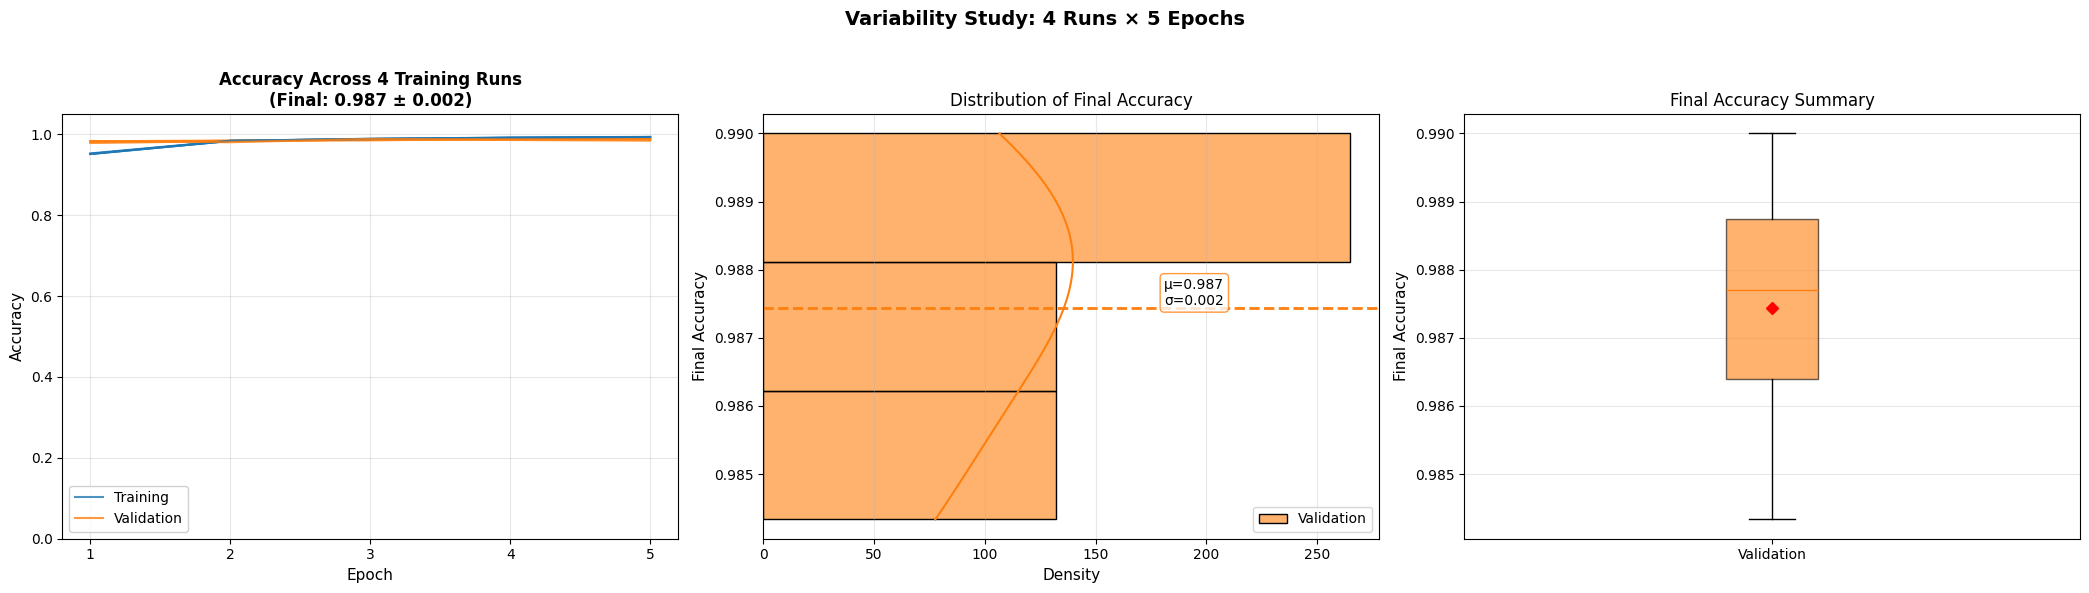


Performing Statistical Comparison of Runs...

Overall Statistical Test Result:
Test Name: Kruskal-Wallis H-Test
Statistic: 1.0686
P-value: 0.7847
Conclusion: There is no statistically significant difference between the runs.


In [4]:
# --- Run the Experiment ---
# Run a variability study with 4 runs
study_results = caracal.run_variability_study(
    model_builder=create_simple_cnn,
    data_handler=mnist_handler,
    model_config=model_config,
    num_runs=4,
    logger=BaseLogger()
)

# Print a summary of the results
print("\n" + "="*50)
print("Experiment Complete: Summary of Final Results")
print(study_results.summarize())

# Get a DataFrame of the final metrics for a more detailed view
results_df = study_results.to_dataframe()
print("\nFinal Metrics DataFrame:")
print(results_df)

# --- Analysis ---
# 5.1. Plotting the training histories
all_histories = study_results.all_runs_metrics
from caracal.plotting import plot_variability_summary

print("\nPlotting Variability Summary...")
plot_variability_summary(
    all_runs_metrics_list=all_histories,
    final_metrics_series=study_results.final_val_accuracies,
    metric='accuracy',
    show_boxplot=True
)

# 5.2. Statistical Comparison of Runs
print("\nPerforming Statistical Comparison of Runs...")
statistical_comparison = study_results.compare_models_statistically(
    metric_name='val_accuracy'
)

overall_result = statistical_comparison['overall_test']

print("\nOverall Statistical Test Result:")
print(f"Test Name: {overall_result.test_name}")
print(f"Statistic: {overall_result.statistic:.4f}")
print(f"P-value: {overall_result.p_value:.4f}")

if overall_result.is_significant():
    print("Conclusion: There is a statistically significant difference between the runs.")
else:
    print("Conclusion: There is no statistically significant difference between the runs.")